### Sklearn Classification Tree + Grid Search

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree

In [2]:
# Load the data
diabetes = pd.read_csv('./datasets/diabetes.csv')

In [3]:
# Divide features and target variable transforming them into matrices
X = diabetes.drop(['Outcome'], axis=1).values
y = diabetes['Outcome'].values

# Split the dataset into training and test sets through hold-out strategy
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [4]:
# Set grid search
param_grid = {
    'criterion': ['entropy'],
    'min_samples_leaf': [2, 5, 10, 20],
    'max_depth': [5, 10, 20]
}

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object -> Cross validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=True)
# Train all the classifiers
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy'], 'max_depth': [5, 10, 20],
                         'min_samples_leaf': [2, 5, 10, 20]},
             scoring='accuracy', verbose=True)

In [5]:
# Get the combination of hyperparameters from the grid search corresponding to the best model
best_params = grid_search.best_params_
print(f"Best model: {best_params}")

Best model: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}


In [6]:
# Select the best model and Compute predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation of the model
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred)}")
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy on Test Set: 0.7987012987012987
Confusion Matrix:
 [[83 17]
 [14 40]]


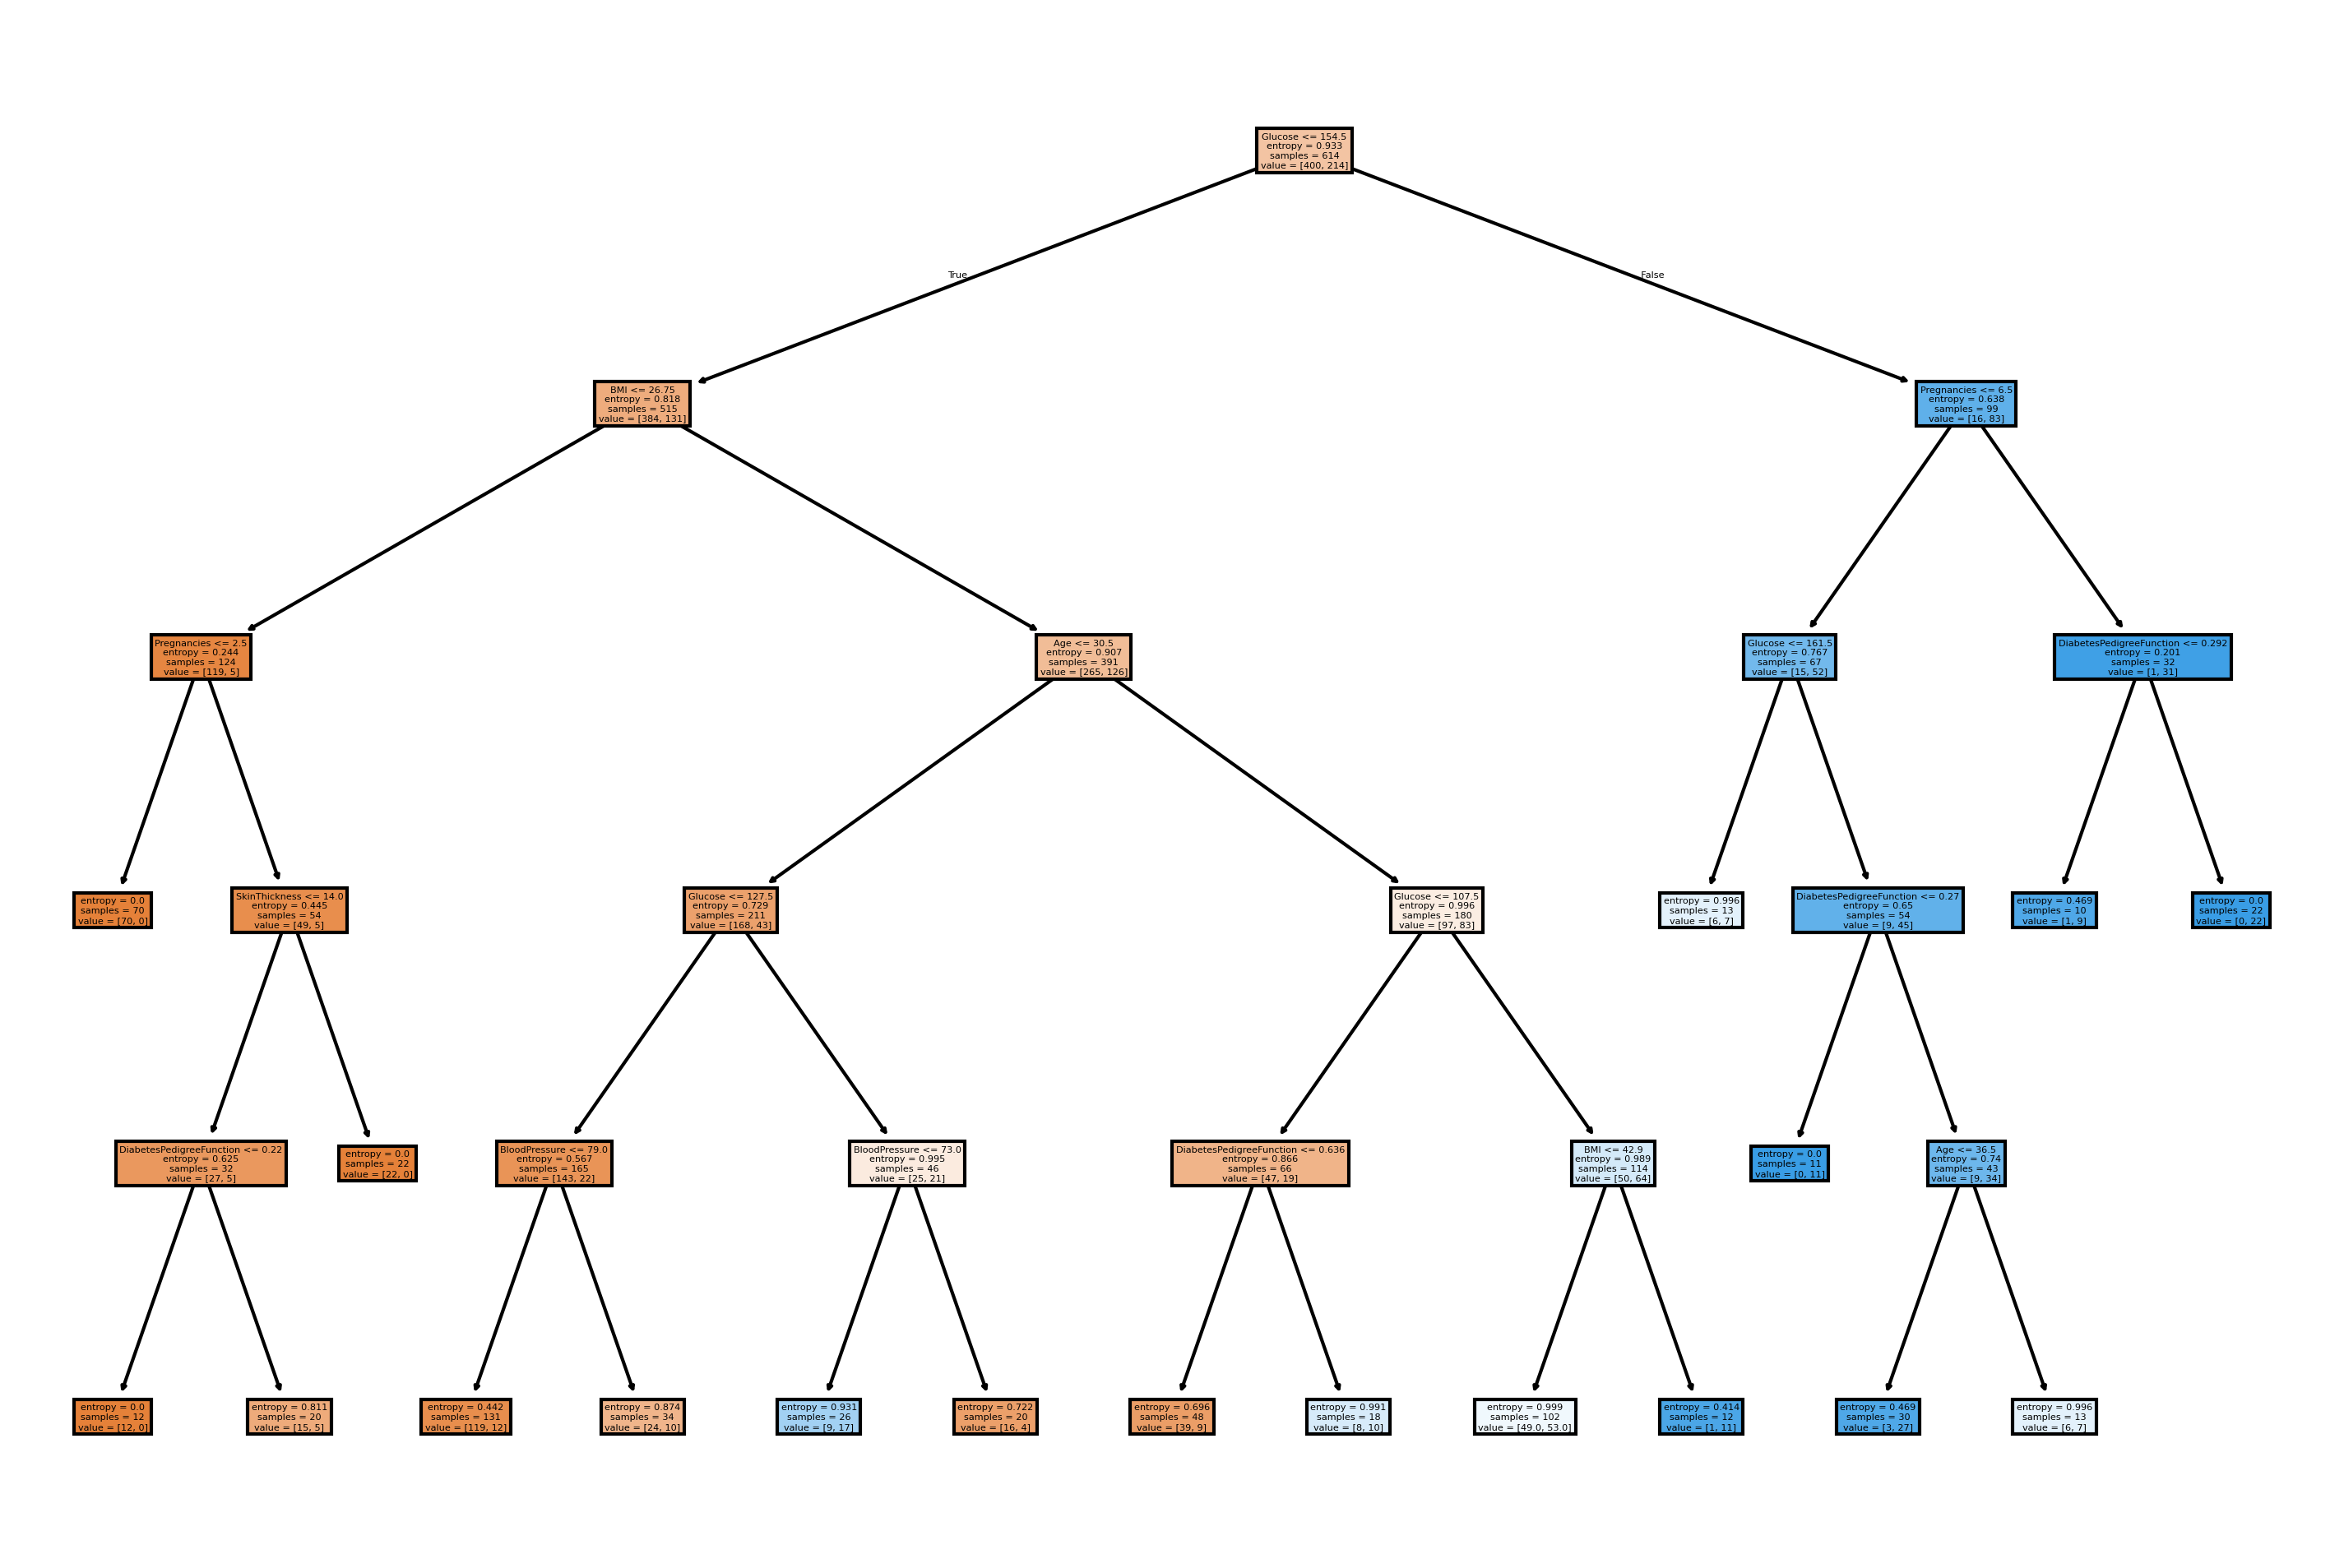

In [7]:
# Plot the best model
plt.figure(figsize=(12, 8), dpi=300)
plot_tree(best_model, feature_names=diabetes.columns, filled=True)
plt.show()